In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [33]:
x,y = sklearn.datasets.make_moons(200, noise=0.20)

In [34]:
x

array([[ 2.09871583,  0.17105774],
       [ 0.10853736,  0.04215159],
       [ 0.97141261,  0.71942167],
       [-1.07471251,  0.64719059],
       [ 1.86244106,  0.45539408],
       [ 0.22350651, -0.04262002],
       [ 0.70377229,  0.73703409],
       [ 1.81410241,  0.21499608],
       [-0.21363285,  0.81853017],
       [ 0.21156898,  0.04416123],
       [ 1.94059041, -0.19211804],
       [ 1.61076108, -0.51505509],
       [ 1.40342877, -0.65858752],
       [-1.06098182,  0.50284032],
       [-0.64395588,  0.83238326],
       [ 1.35296277, -0.29856434],
       [-0.50073243,  1.12635985],
       [ 0.03306314,  1.23180719],
       [-1.20550256,  0.01679426],
       [ 0.3386563 , -0.26274051],
       [-0.52916244,  1.08330853],
       [-0.85895797, -0.12315832],
       [ 0.14614256,  0.30484082],
       [ 1.23170584, -0.2655198 ],
       [ 0.88585272,  0.79944701],
       [ 0.98526623, -0.82884615],
       [ 0.83003293, -0.06576919],
       [ 1.80583126, -0.24733603],
       [ 0.3070736 ,

In [35]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1], dtype=int64)

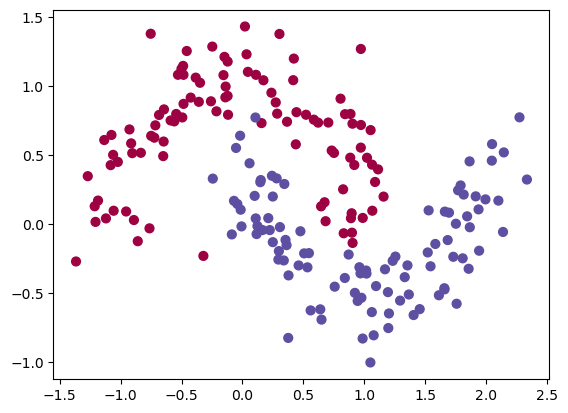

In [36]:
plt.scatter(x[:,0],x[:,1], s=40, c=y,cmap=plt.cm.Spectral)
plt.show()

In [37]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [38]:
x

tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1])

In [39]:
y

tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1])

In [42]:
# A simple feedforward neural network (1 hidden layer) using PyTorch

import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        
        # Define the hidden layer: input → hidden
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        
        # Define the output layer: hidden → output
        self.out = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x):
        x = self.hidden(x)   # Apply hidden layer
        x = F.relu(x)        # Activation function (ReLU)
        x = self.out(x)      # Apply output layer
        return x

In [45]:
# Initialize the feedforward neural network
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

# Set up the optimizer using Stochastic Gradient Descent
optimizer = torch.optim.SGD(network.parameters(), lr=0.02)

# Define the loss function for classification
loss_function = nn.CrossEntropyLoss()


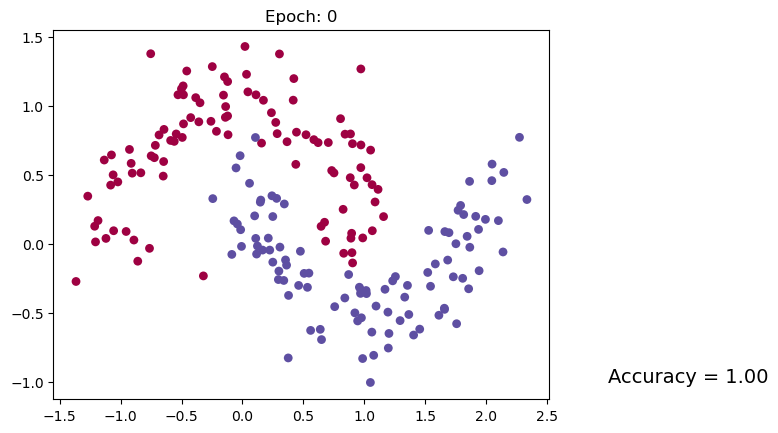

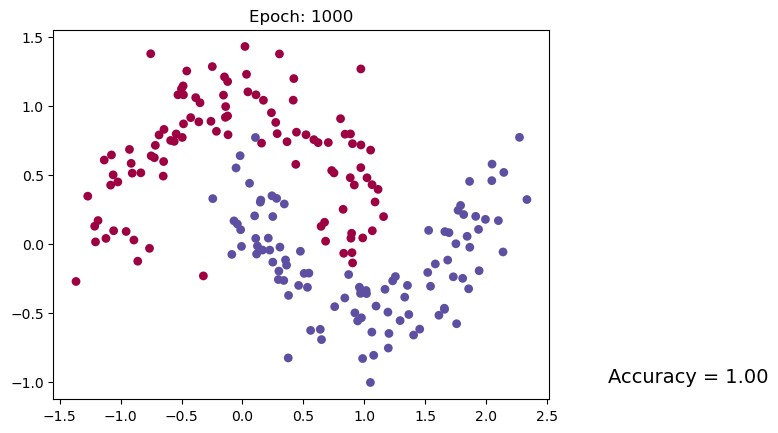

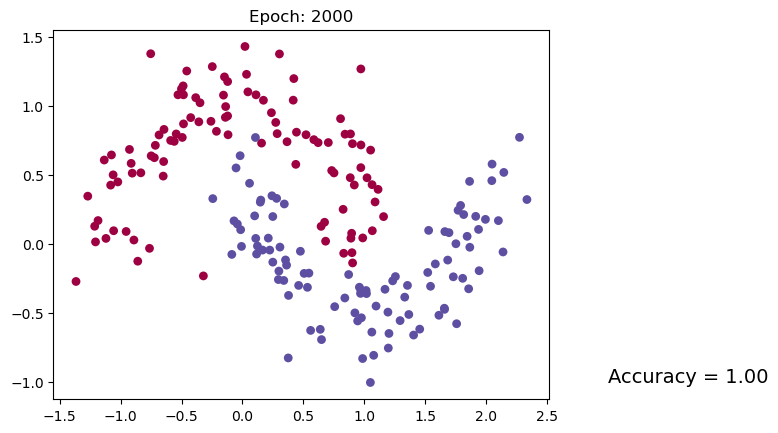

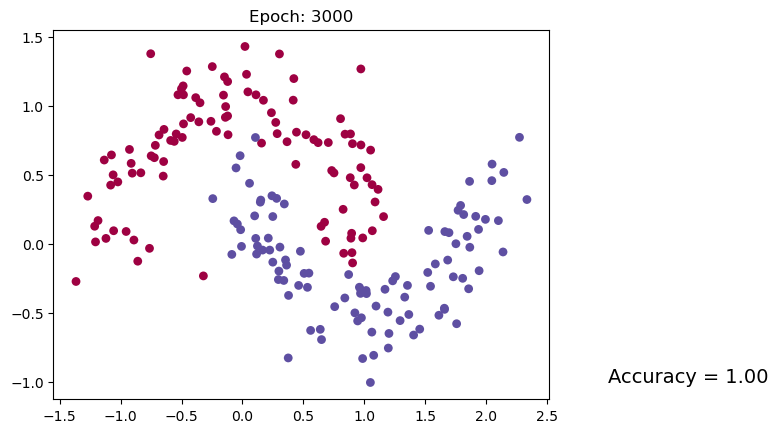

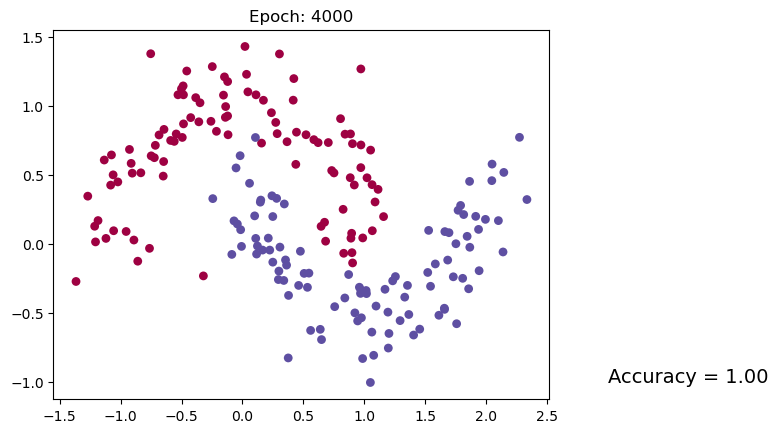

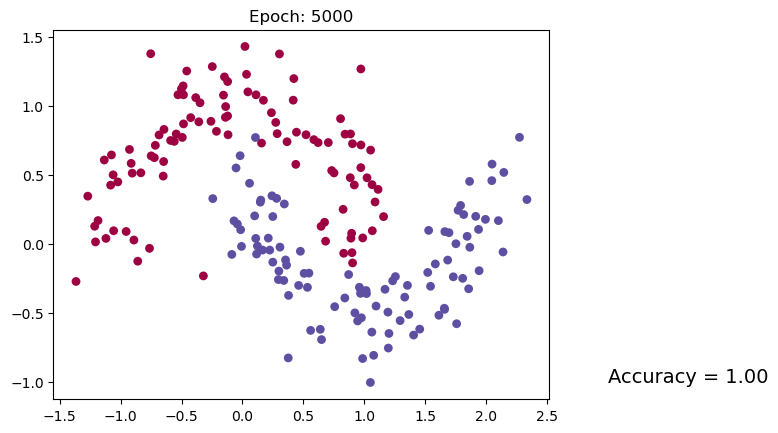

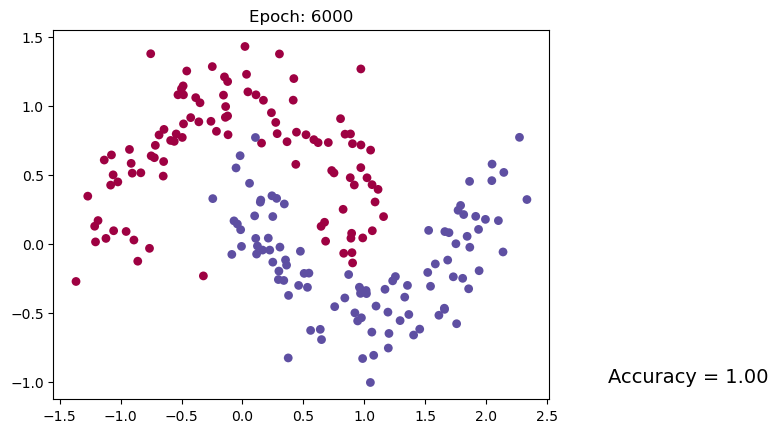

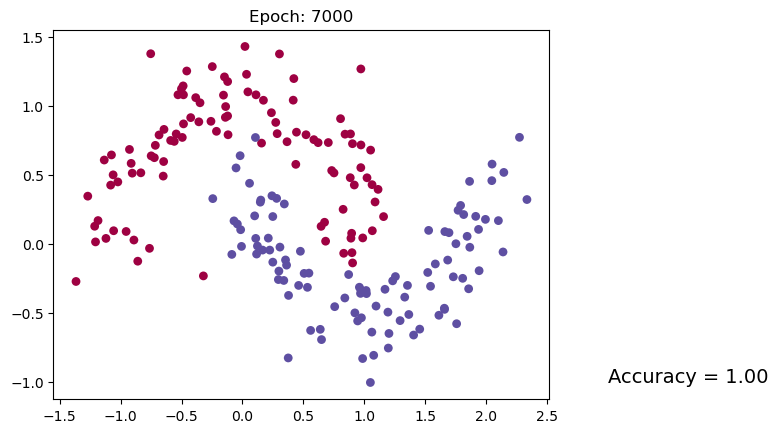

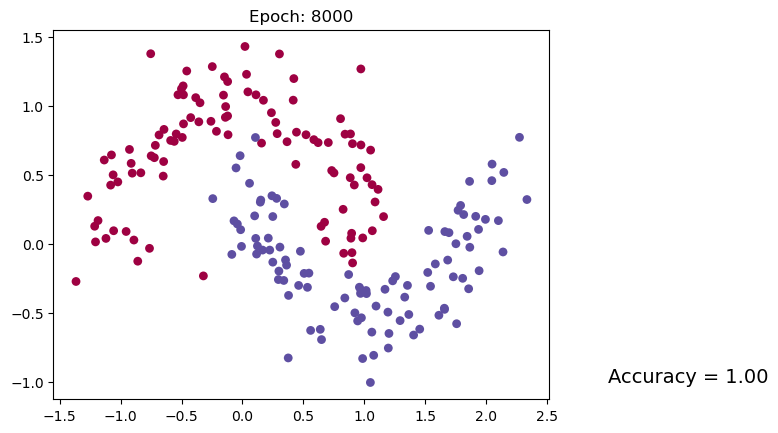

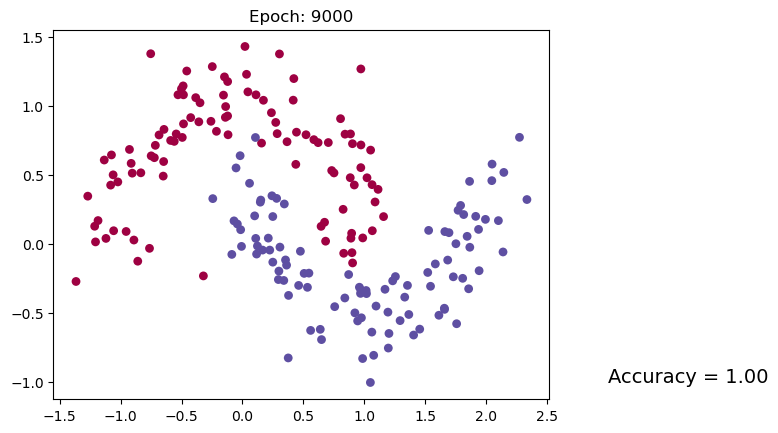

In [64]:
plt.ion()  # Turn on interactive mode for live plotting

for epoch in range(10000):
    out = network.forward(x)  # Forward pass: compute model output
    loss = loss_function(out, y)  # Compute loss between prediction and true labels
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Backpropagation: compute gradients
    optimizer.step()  # Update model weights

    if epoch % 1000 == 0:
        # show the learning process every 1000 epochs
        max_value, prediction = torch.max(out, 1)  # Get predicted class (argmax)
        predicted_y = prediction.data.numpy()  # Convert tensor to NumPy
        target_y = y.data.numpy()  # Convert ground truth to NumPy
        
        plt.clf()  # Clear previous plot

        # Plot data points colored by predicted class
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], 
                    s=40, c=predicted_y, cmap=plt.cm.Spectral, lw=0)

        # Calculate and show accuracy on the plot
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict={'size': 14})
        plt.title(f"Epoch: {epoch}")  # Show current epoch number
        plt.pause(0.1)  # Pause to update plot visually

plt.ioff()  # Turn off interactive mode
plt.show()  # Show final plot
